In [105]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import pyplot
import datetime as dt
from datetime import datetime
import numpy as np
import pandas as pd

In [ ]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [ ]:
Base = automap_base()
Base.prepare(engine, reflect=True)    
Base.classes.keys()

In [ ]:
stations = Base.classes.stations
measurment = Base.classes.measurement

In [ ]:
session = Session(engine)


In [ ]:
session.query(measurment.date).first()

In [8]:
prcp = session.query(measurment.prcp).all()
date = session.query(measurment.date).all()

In [9]:
modified_date = session.query(measurment.date).\
    filter(measurment.date > '2016-12-31').\
    order_by(measurment.date).all()

In [10]:
measurement_data = conn.execute("select date, prcp from measurments WHERE date > '2016-12-31'").fetchall()

In [11]:
date_list = []
prcp_list = []
for date in measurement_data:
    date_list.append(date[0])
    prcp_list.append(date[1])

In [12]:
import seaborn as sbrn

In [13]:
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in date_list]

C:\Users\Gevork\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


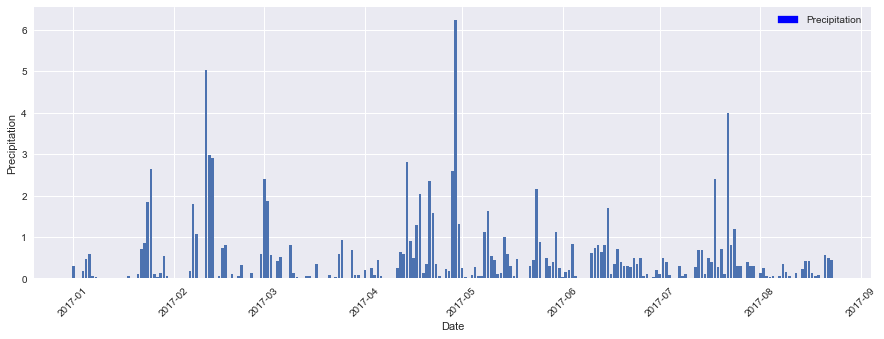

In [14]:
sbrn.set()
plt.figure(figsize=(15,5))
plt.bar(left = dates_list, height = prcp_list )
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")

patch = mpatches.Patch(color = "blue", label='Precipitation')
plt.legend(handles=[patch])
plt.show()

In [15]:
measurments = pd.read_csv("C:\\Users\Gevork\Desktop\clean_hawaii_measurements.csv")
measurments["prcp"].describe()

count    19550.000000
mean         0.148753
std          0.453021
min          0.000000
25%          0.000000
50%          0.010000
75%          0.090000
max         11.530000
Name: prcp, dtype: float64

In [16]:
total_number_of_stations = conn.execute("SELECT COUNT(*) FROM stations;").fetchall()
print("The total number of stations are %s " % (total_number_of_stations))

The total number of stations are [(9,)] 


In [17]:
conn.execute("SELECT station, tobs  FROM Measurments GROUP BY station ;").fetchall()
# USC00514830 & USC00519523 :82

[('USC00511918', 64),
 ('USC00513117', 77),
 ('USC00514830', 82),
 ('USC00516128', 76),
 ('USC00517948', 81),
 ('USC00518838', 70),
 ('USC00519281', 79),
 ('USC00519397', 81),
 ('USC00519523', 82)]

In [18]:
date_and_tobs = conn.execute("SELECT date, tobs FROM Measurments LEFT JOIN Stations ON Measurments.station = Stations.station WHERE date > '2016-12-31'").fetchall()

In [19]:
Dates = conn.execute("SELECT date, prcp FROM Measurments WHERE date >= 2017-10-1 and date <= 2017-10-2")

In [20]:
date_list_station = [] 
tobs_list = []
for data in date_and_tobs:
    time = dt.datetime.strptime(data[0], "%Y-%m-%d").date()
    date_list_station.append(time)
    tobs_list.append(data[1])

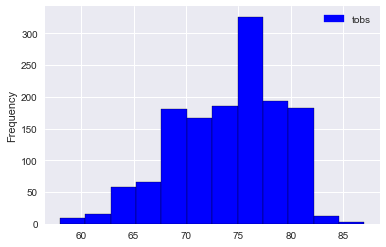

In [21]:
plt.hist(tobs_list, bins = 12, color = "blue", edgecolor = "black")
plt.ylabel("Frequency")
patch = mpatches.Patch(color = "blue", label='tobs')
plt.legend(handles=[patch])
plt.show()

In [22]:
time_df = pd.DataFrame(date_and_tobs, columns = ["Date", "Tobs"])
time_df["Date"] = pd.to_datetime(time_df["Date"])

In [92]:
def calc_temps(start_date, end_date):
    st_end = time_df[(time_df["Date"] >= start_date) & (time_df["Date"] <= end_date)] 
    mean = round(np.mean(st_end["Tobs"]), 2)
    minimum = np.min(st_end["Tobs"])
    maximum = np.max(st_end["Tobs"])
   

    
    print("The average Temperature from %s to %s is %s" % (start_date, end_date, mean ))
    print("The minimum Temperature from %s to %s is %s" % (start_date, end_date, minimum ))
    print("The maximum Temperature from %s to %s is %s" % (start_date, end_date, maximum ))

In [93]:
calc_temps("2017-1-1", "2018-1-1")

The average Temperature from 2017-1-1 to 2018-1-1 is 74.14
The minimum Temperature from 2017-1-1 to 2018-1-1 is 58
The maximum Temperature from 2017-1-1 to 2018-1-1 is 87


In [96]:
avg = round(time_df['Tobs'].mean())

In [101]:
avg

74

In [111]:
high = time_df["Tobs"].max()
low = time_df["Tobs"].min()
x_axis = np.arange(avg)

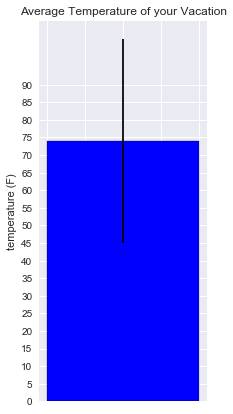

In [116]:
fig, ax = pyplot.subplots(figsize=(3,7))
ax.bar(1, avg, color = 'blue', edgecolor = 'black', yerr=(high-low), capsize=7, label='test')
ax.set_xticklabels([])
plt.yticks(np.arange(0, avg+20, 5))
plt.title ("Average Temperature of your Vacation")
plt.ylabel ("temperature (F)")
plt.show()